# Wikipedia Revisions Workshop

This notebook contains some notes for collecting Wikipedia article revisions using [wikipediarevs]. wikipediarevs was designed to work off of a list of Wikipedia URLs because the job of mapping names (for things, places, people) to Wikipedia articles can be tricky to say the least.

If you already have a list of Wikipedia URLs you can jump to the [Run wikipediarevs](#Run-wikipediarevs) section below.

## List of Names

If you are starting with a list of names like the ones in [CongressmenBR.csv](CongressmenBR.csv) and want to get Wikipedia URLs for those one way of approaching this is to use [OpenRefine] to "reconcile" the names to [Wikidata]. Wikidata is a data oriented wiki that contains structured information (metadata) about entities in all the Wikipedias.

Once reconciliation completes (it make take some time) you can can review the matches, and then use the reconciled entities to generate a URL for pt.wikipedia.org. For any entities that don't reconcile cleanly OpenRefine will let you decide. There are other ways of doing this of course, but this is just one way. 

Here are some screenshots for the process:

### Load your CSV

<img width="1000" src="images/screenshot-01.png">

### Reconcile

Click on the arrow in the column with the name you want to reconcile and select *Reconcile* and *Start Reconciling*:

<img width="1000" src="images/screenshot-02.png">

Depending on what you are reconciling it will try to guess the *type* of entity to match against in Wikidata. For our politicians it should be *human*. Click to *Start reconciling*.

<img width="1000" src="images/screenshot-03.png">

Some of the names will match, in this case 398:

<img width="1000" src="images/screenshot-04.png">

Others (196) require some feedback about what the correct Wikidata entity to use. Most of the time you will need to tell OpenRefine which entity to use. In this example we need to distinguish beteen Alê Silva the politician vs the footballer.
  
<img width="1000" src="images/screenshot-05.png">

### Create Wikipedia Links

While OpenRefine makes it easy to pull additional information as new columns, to get the Wikipedia URL is a bit tricky. First you need to select the arrow in the column containing the Wikiedata entities, and select *Edit column* and then *Add columns from reconciled values*.

<img width="1000" src="images/screenshot-06.png">

In the property box enter *Sptwiki* for the Portuguese Wikipedia label, which will be used to construct the URL. Most of the time it may look identical to the name, but not always:

<img width="1000" src="images/screenshot-07.png">

That should create a column *Sitelink ptwiki*.

<img width="1000" src="images/screenshot-08.png">

Click in the label and select *Edit cells* and then *Transform*.

<img width="1000" src="images/screenshot-09.png">

There may be other ways to do this, but here we are going to select *Python* so we can use a bit of Python to prepend a URL prefix to the label, while replacing the spaces with an underscore:

```python
def pt_url(s):
  s = s.replace(" ", "_")
  return "https://pt.wikipedia.org/wiki/" + s

return pt_url(value)
```

<img width="1000" src="images/screenshot-10.png">

### Export the CSV

Remember we want to get a file of just the Wikipedia URLs to give to `wikipediarevs`. If you want you can export the CSV and then extract the column using your favorite tool (Google Sheets, R, etc):

<img width="1000" src="images/screenshot-11.png">

Or if you want you can remove the extraneous columns and export that instead:

<img width="1000" src="images/screenshot-12.png">

<img width="1000" src="images/screenshot-13.png">

[OpenRefine]: https://openrefine.org/
[wikipediarevs]: https://pypi.org/project/wikipediarevs/
[Wikidata]: https://wikidata.org

## The Revisions API

The Wikipedia API is actually a general feature of the [MediaWiki](https://www.mediawiki.org/wiki/API:Main_page) open source software that is used to host all 332 language editions of Wikipedia. It has been around for some time (20 years?) and has allowed developers to create tools that programatically read, search and update articles. Many of these are [bots](https://en.wikipedia.org/wiki/Category:All_Wikipedia_bots) which perform all sorts of operations such as correcting misspellings, removing abusive language, flagging spam, etc. It is quite a complex and archaic API, but it is also quite powerful. You need an API key to modify data, but not to read data.

One of the remarkable things about Wikipedia is that every change is available as a revision. You can see this when In some rare cases, such as leaking of personally identifying information (PII), the content of a revision can be deleted. The API allows you to fetch revisions using the [prop=revisions](https://www.mediawiki.org/wiki/API:Revisions) endpoint. You can request up to 500 revisions at a time, and can request revisions for more than one article if you want. When requesting the revisions you can define what revision properties to return.

The wikipediarevs tool is automatically set to return all revision properties, and to request the maximum revisions (500) for an article. Wikipedia extends the parameters a little bit over what standard Mediawiki provides by adding the `flagged` and `orescores` properties.

For example here is what the API URL looks like to fetch up to the last 500 edits to the article about [Jack Teixeira](https://en.wikipedia.org/wiki/Jack_Teixeira) who recently leaked Pentagon documents.

https://en.wikipedia.org/w/api.php?action=query&format=json&prop=revisions&titles=Jack_Teixeira&rvlimit=500&rvprop=ids|flags|timestamp|user|userid|size|slotsize|sha1|slotsha1|contentmodel|comment|parsecomment|content|tags|roles|parsetree|flagged|orescores

## Run wikipediarevs

If you are running this notebook in Colab or on your computer you can execute this cell here. Otherwise you will need to install Python3 and then open a terminal/console window and install wikipediarevs with pip:

In [67]:
! pip install wikipediarevs

Then assuming you've got a file urls.txt you can run wikipediarevs on it (note the output below is truncated because I ran it previously):

In [2]:
! wikipediarevs urls.txt

revisions/pt.wikipedia.org/Abou_Anni/65595980.json
revisions/pt.wikipedia.org/Acácio_Favacho/65659313.json
revisions/pt.wikipedia.org/Acir_Gurgacz/65507954.json
revisions/pt.wikipedia.org/Adolfo_Viana/65333194.json
revisions/pt.wikipedia.org/Adriana_Ventura/65606462.json
revisions/pt.wikipedia.org/Adriano_Avelar/65659419.json
revisions/pt.wikipedia.org/Aécio_Neves/65618033.json
revisions/pt.wikipedia.org/Aelton_Freitas/65510885.json
revisions/pt.wikipedia.org/Afonso_Florence/65024989.json
revisions/pt.wikipedia.org/Afonso_Hamm/65655344.json
revisions/pt.wikipedia.org/Afonso_Motta/64684284.json
revisions/pt.wikipedia.org/Airton_Faleiro/65655337.json
revisions/pt.wikipedia.org/Antônio_José_Albuquerque/65003835.json
revisions/pt.wikipedia.org/Alceu_Moreira/64794016.json
revisions/pt.wikipedia.org/Alcides_Rodrigues/65535439.json
revisions/pt.wikipedia.org/Alencar_Santana/65330453.json
revisions/pt.wikipedia.org/Alê_Silva/65547465.json
revisions/pt.wikipedia.org/Alessandro_Molon/65505336.js

## Analysis

Each JSON file represents a revision of a particular article from the Wikipedia API. You can learn more about the API [here](https://en.wikipedia.org/w/api.php?action=help&modules=query%2Brevisions). 

Each revision (for example `revisions/pt.wikipedia.org/Zé_Vitor/65605943.json`) is structured like this:

```json
{
  "revid": 65605943,
  "parentid": 65329776,
  "user": "Firewaalls",
  "userid": 2894359,
  "timestamp": "2023-03-31T01:29:47Z",
  "size": 2994,
  "sha1": "587574c726dabcbfde448c56bf80655764510260",
  "roles": [
    "main"
  ],
  "contentmodel": "wikitext",
  "parsetree": "<root><template><title>Info/Pol\u00edtico\n</title><part><name>nome </name><equals>=</equals><value> Z\u00e9 Vitor\n</value></part><part><name>imagem </name><equals>=</equals><value> Z\u00e9 Vitor.jpg\n</value></part><part><name>imagem_tamanho </name><equals>=</equals><value> 250px\n</value></part><part><name>legenda  </name><equals>=</equals><value>\n</value></part><part><name> t\u00edtulo1 </name><equals>=</equals><value> [[Deputado federal]] de [[Minas Gerais]]\n</value></part><part><name> mandato1 </name><equals>=</equals><value> [[1\u00ba de fevereiro]] de [[2019]] &lt;br/&gt; at\u00e9 atualidade\n</value></part><part><name>vice_t\u00edtulo1       </name><equals>=</equals><value> Legislatura\n</value></part><part><name>vice1              </name><equals>=</equals><value> [[Lista de deputados federais do Brasil da 57.\u00aa legislatura|57\u00aa legislatura (2023 \u2014 2027)]]\n</value></part><part><name> nome_comp </name><equals>=</equals><value> Jos\u00e9 Vitor de Resende Aguiar\n</value></part><part><name> nascimento_data </name><equals>=</equals><value> <template><title>dni</title><part><name index=\"1\"/><value>1</value></part><part><name index=\"2\"/><value>11</value></part><part><name index=\"3\"/><value>1984</value></part><part><name>lang</name><equals>=</equals><value>br</value></part></template>\n</value></part><part><name> nacionalidade </name><equals>=</equals><value> [[Brasileiro]]\n</value></part><part><name> nascimento_local </name><equals>=</equals><value> [[Araguari]], [[Minas Gerais]]\n</value></part><part><name> partido </name><equals>=</equals><value> [[Partido Democr\u00e1tico Trabalhista|PDT]] <template><title>Pequeno</title><part><name index=\"1\"/><value>(2007-2008)</value></part></template>&lt;br&gt;[[Partido da Social Democracia Brasileira|PSDB]] <template><title>Pequeno</title><part><name index=\"1\"/><value>(2008-2011)</value></part></template>&lt;br&gt;[[Movimento Democr\u00e1tico Brasileiro (1980)|PMDB]] <template><title>Pequeno</title><part><name index=\"1\"/><value>(2011-2013)</value></part></template>&lt;br&gt;[[Partido Social Crist\u00e3o|PSC]] <template><title>Pequeno</title><part><name index=\"1\"/><value>(2013-2018)</value></part></template>&lt;br&gt;[[Patriota (Brasil)|PATRI]] <template><title>Pequeno</title><part><name index=\"1\"/><value>(2018)</value></part></template>&lt;br&gt;[[Avante]] <template><title>Pequeno</title><part><name index=\"1\"/><value>(2018)</value></part></template>&lt;br&gt;[[Partido da Mobiliza\u00e7\u00e3o Nacional|PMN]] <template><title>Pequeno</title><part><name index=\"1\"/><value>(2018-2019)</value></part></template>&lt;br&gt;[[Partido Liberal (2006)|PL]] <template><title>Pequeno</title><part><name index=\"1\"/><value>(2019-presente)</value></part></template>\n</value></part><part><name> ocupa\u00e7\u00e3o </name><equals>=</equals><value> [[Engenheiro]] e [[pol\u00edtico]]\n</value></part></template>\n\n'''Jos\u00e9 Vitor de Resende Aguiar '''([[Araguari]], [[1 de novembro]] de [[1984]]), mais conhecido como '''Z\u00e9 Vitor''', \u00e9 um [[engenheiro]] e [[pol\u00edtico]] brasileiro filiado ao [[Partido Liberal (2006)|Partido Liberal]] (PL).\n\nNas elei\u00e7\u00f5es de [[2018]], foi candidato a deputado federal Sendo eleito com 32.833 votos Pelo [[Partido da Mobiliza\u00e7\u00e3o Nacional|PMN]].<ext><name>ref</name><attr/><inner>{{citar web|url=https://especiais-gazetadopovo-com-br.cdn.ampproject.org/v/s/especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/mg/deputado-federal/ze-vitor-3333?amp_js_v=a2&amp;amp_gsa=1&amp;amp=true&amp;usqp=mq331AQECAFYAQ%3D%3D#referrer=https%3A%2F%2Fwww.google.com&amp;amp_tf=Fonte%3A%20%251%24s&amp;ampshare=https%3A%2F%2Fespeciais.gazetadopovo.com.br%2Feleicoes%2F2018%2Fcandidatos%2Fmg%2Fdeputado-federal%2Fze-vitor-3333|t\u00edtulo =Candidato Z\u00e9 Victor|acessodata =29 de outubro de 2018}}</inner><close>&lt;/ref&gt;</close></ext> Em 2022, foi reeleito deputado federal, desta vez pelo PL.<ext><name>ref</name><attr/><inner>{{Citar web|url=https://www.estadao.com.br/politica/eleicoes-2022-veja-lista-com-todos-os-deputados-federais-eleitos-no-brasil/|titulo=Elei\u00e7\u00f5es 2022: Veja lista com todos os deputados federais eleitos no Brasil|acessodata=2022-10-03|website=Estad\u00e3o|lingua=pt-br}}</inner><close>&lt;/ref&gt;</close></ext>\n \n\n\n<template lineStart=\"1\"><title>Refer\u00eancias</title></template>\n\n[[Categoria:Nascidos em 1984]]\n[[Categoria:Naturais de Araguari]]\n\n<template lineStart=\"1\"><title>Esbo\u00e7o-pol\u00edtico</title></template>\n<template lineStart=\"1\"><title>Portal3</title><part><name index=\"1\"/><value>Biografias</value></part><part><name index=\"2\"/><value>Pol\u00edtica</value></part><part><name index=\"3\"/><value>Brasil</value></part><part><name index=\"4\"/><value>Minas Gerais</value></part></template>\n[[Categoria:Membros do Partido da Mobiliza\u00e7\u00e3o Nacional]]\n[[Categoria:Deputados federais do Brasil por Minas Gerais]]\n[[Categoria:Engenheiros de Minas Gerais]]\n[[Categoria:Membros do Partido Democr\u00e1tico Trabalhista]]\n[[Categoria:Membros do Partido da Social Democracia Brasileira]]\n[[Categoria:Membros do Movimento Democr\u00e1tico Brasileiro (1980)]]\n[[Categoria:Membros do Partido Social Crist\u00e3o]]\n[[Categoria:Membros do Patriota (Brasil)]]\n[[Categoria:Membros do Avante (partido pol\u00edtico)]]\n[[Categoria:Membros do Partido Liberal (2006)]]</root>",
  "contentformat": "text/x-wiki",
  "comment": "{info}",
  "tags": [
    "mobile edit",
    "mobile web edit"
  ],
  "*": "{{Info/Pol\u00edtico\n|nome = Z\u00e9 Vitor\n|imagem = Z\u00e9 Vitor.jpg\n|imagem_tamanho = 250px\n|legenda  =\n| t\u00edtulo1 = [[Deputado federal]] de [[Minas Gerais]]\n| mandato1 = [[1\u00ba de fevereiro]] de [[2019]] <br/> at\u00e9 atualidade\n|vice_t\u00edtulo1       = Legislatura\n|vice1              = [[Lista de deputados federais do Brasil da 57.\u00aa legislatura|57\u00aa legislatura (2023 \u2014 2027)]]\n| nome_comp = Jos\u00e9 Vitor de Resende Aguiar\n| nascimento_data = {{dni|1|11|1984|lang=br}}\n| nacionalidade = [[Brasileiro]]\n| nascimento_local = [[Araguari]], [[Minas Gerais]]\n| partido = [[Partido Democr\u00e1tico Trabalhista|PDT]] {{Pequeno|(2007-2008)}}<br>[[Partido da Social Democracia Brasileira|PSDB]] {{Pequeno|(2008-2011)}}<br>[[Movimento Democr\u00e1tico Brasileiro (1980)|PMDB]] {{Pequeno|(2011-2013)}}<br>[[Partido Social Crist\u00e3o|PSC]] {{Pequeno|(2013-2018)}}<br>[[Patriota (Brasil)|PATRI]] {{Pequeno|(2018)}}<br>[[Avante]] {{Pequeno|(2018)}}<br>[[Partido da Mobiliza\u00e7\u00e3o Nacional|PMN]] {{Pequeno|(2018-2019)}}<br>[[Partido Liberal (2006)|PL]] {{Pequeno|(2019-presente)}}\n| ocupa\u00e7\u00e3o = [[Engenheiro]] e [[pol\u00edtico]]\n}}\n\n'''Jos\u00e9 Vitor de Resende Aguiar '''([[Araguari]], [[1 de novembro]] de [[1984]]), mais conhecido como '''Z\u00e9 Vitor''', \u00e9 um [[engenheiro]] e [[pol\u00edtico]] brasileiro filiado ao [[Partido Liberal (2006)|Partido Liberal]] (PL).\n\nNas elei\u00e7\u00f5es de [[2018]], foi candidato a deputado federal Sendo eleito com 32.833 votos Pelo [[Partido da Mobiliza\u00e7\u00e3o Nacional|PMN]].<ref>{{citar web|url=https://especiais-gazetadopovo-com-br.cdn.ampproject.org/v/s/especiais.gazetadopovo.com.br/eleicoes/2018/candidatos/mg/deputado-federal/ze-vitor-3333?amp_js_v=a2&amp_gsa=1&amp=true&usqp=mq331AQECAFYAQ%3D%3D#referrer=https%3A%2F%2Fwww.google.com&amp_tf=Fonte%3A%20%251%24s&ampshare=https%3A%2F%2Fespeciais.gazetadopovo.com.br%2Feleicoes%2F2018%2Fcandidatos%2Fmg%2Fdeputado-federal%2Fze-vitor-3333|t\u00edtulo =Candidato Z\u00e9 Victor|acessodata =29 de outubro de 2018}}</ref> Em 2022, foi reeleito deputado federal, desta vez pelo PL.<ref>{{Citar web|url=https://www.estadao.com.br/politica/eleicoes-2022-veja-lista-com-todos-os-deputados-federais-eleitos-no-brasil/|titulo=Elei\u00e7\u00f5es 2022: Veja lista com todos os deputados federais eleitos no Brasil|acessodata=2022-10-03|website=Estad\u00e3o|lingua=pt-br}}</ref>\n \n\n\n{{Refer\u00eancias}}\n\n[[Categoria:Nascidos em 1984]]\n[[Categoria:Naturais de Araguari]]\n\n{{Esbo\u00e7o-pol\u00edtico}}\n{{Portal3|Biografias|Pol\u00edtica|Brasil|Minas Gerais}}\n[[Categoria:Membros do Partido da Mobiliza\u00e7\u00e3o Nacional]]\n[[Categoria:Deputados federais do Brasil por Minas Gerais]]\n[[Categoria:Engenheiros de Minas Gerais]]\n[[Categoria:Membros do Partido Democr\u00e1tico Trabalhista]]\n[[Categoria:Membros do Partido da Social Democracia Brasileira]]\n[[Categoria:Membros do Movimento Democr\u00e1tico Brasileiro (1980)]]\n[[Categoria:Membros do Partido Social Crist\u00e3o]]\n[[Categoria:Membros do Patriota (Brasil)]]\n[[Categoria:Membros do Avante (partido pol\u00edtico)]]\n[[Categoria:Membros do Partido Liberal (2006)]]"
}
```



While it's understood you are going to be analysis in R, we could load up all the JSON files into a Pandas dataframe, and analyze them:

In [25]:
! pip3 install pandas

In [13]:
import os
import json
import pandas

# create an array of all the DataFrames
dfs = []
for dirpath, dirnames, filenames in os.walk('revisions'):
    for filename in filenames:
        json_path = os.path.join(dirpath, filename)
        data = json.load(open(json_path))
        dfs.append(pandas.json_normalize(data))

# concatenate them into one dataframe
df = pandas.concat(dfs, ignore_index=True)

df

,revid,parentid,user,userid,timestamp,size,sha1,roles,contentmodel,parsetree,...,comment,tags,*,minor,anon,sha1hidden,texthidden,commenthidden,userhidden,suppressed
0,62463644,62280814,Castrowikis,2435329.0,2021-11-21T14:24:01Z,2414,950eb03ac4c7c14014ec260acc1cce71759409dc,[main],wikitext,<root><template><title>Info/Político\n</title>...,...,,[visualeditor],{{Info/Político\n| nome = Josimar de Maranhãoz...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64179337,64178868,Lucasmmedeiros,2798007.0,2022-08-10T19:28:48Z,6236,c4cb3c991fc4bc9cd89d8d005928791c2b3dc220,[main],wikitext,<root><template><title>Info/Político\n</title>...,...,adicionei algumas informações,[visualeditor],{{Info/Político\n|nome = Josi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,64183885,64179337,Lucasmmedeiros,2798007.0,2022-08-11T13:44:57Z,6328,271857569bdf219d7bfe6986da931c74961c1f94,[main],wikitext,<root><template><title>Info/Político\n</title>...,...,adicionei informações,[visualeditor],{{Info/Político\n|nome = Josi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,64178855,64178759,Lucasmmedeiros,2798007.0,2022-08-10T18:29:21Z,5530,e02b3baaa1c21037bf0ec81d822fc57b0588bfab,[main],wikitext,<root><template><title>Info/Político\n</title>...,...,alterei alguns detalhes,"[visualeditor, mw-reverted]",{{Info/Político\n|nome = Josi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,55206928,53497697,ThiagoEFS13,2247085.0,2019-05-19T23:59:45Z,2139,68c52d06c8a6974ec85442a9f1a41dc999b7c853,[main],wikitext,<root><template><title>Info/Político\n</title>...,...,,[],{{Info/Político\n|nome = Josimar de Maranh...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43694,51052434,50635168,Érico,710641.0,2018-01-18T15:59:11Z,11238,1befcd4735d5c6233d6b58b204f83bb7c5e01c85,[main],wikitext,<root><template><title>Wikificação</title><par...,...,adicionando imagem / ajustes,[],{{Wikificação|data=abril de 2016}}\n{{Formatar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43695,56079041,55691098,Alch Bot,623182.0,2019-08-25T03:50:04Z,11570,d6b53f2b0284af23d7866ebab9cd2c81dff7d71f,[main],wikitext,<root><template><title>Wikificação</title><par...,...,Robô: Alteração da categoria redirecionada [[:...,[],{{Wikificação|data=abril de 2016}}\n{{Formatar...,,NaN,NaN,NaN,NaN,NaN,NaN
43696,45452754,45452749,Nice poa,59975.0,2016-04-27T06:24:05Z,7942,990a65884120bb30e5ef505aac6165b1bc52bd3d,[main],wikitext,<root><template><title>Wikificação</title><par...,...,"Página marcada para [[WP:WKF|wikificação]], us...",[],{{Wikificação|data=abril de 2016}}\n{{Formatar...,,NaN,NaN,NaN,NaN,NaN,NaN
43697,50127741,49661118,Mageschuch656,1271232.0,2017-10-13T16:22:54Z,11105,e61277126a0fb17a997ef49c89c722472023593e,[main],wikitext,<root><template><title>Wikificação</title><par...,...,,[],{{Wikificação|data=abril de 2016}}\n{{Formatar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


And we can see what users created the most edits:

In [23]:
pandas.set_option('display.max_rows', 100)
df.value_counts('user').sort_values(ascending=False)[0:100]

user
Érico                      1001
Felipe Collar Berni         643
Alch Bot                    619
Instambul                   613
Yanguas                     543
Kaktus Kid                  463
PauloMSimoes                402
Bageense                    402
Nice poa                    342
Simplus Menegati            340
Gipovannipannunzio          315
Aleth Bot                   304
O revolucionário aliado     294
Salebot                     249
Dantadd                     230
79a                         222
Monfrelindo                 222
SintoniaVerdadeira          213
Jadolfo                     204
CommonsDelinker             199
Chronus                     193
Mageschuch656               191
Leandrod                    190
Mwaldeck                    185
GRS73                       172
Borowskki                   169
IgorMono                    168
Young Brujah                154
Pilgerowski                 149
Theys York                  146
177.13.67.79                142
DaS

Or we could look at edits over time:

In [50]:
df.timestamp = pandas.to_datetime(df.timestamp)

counts = df.resample('1w', on='timestamp').agg('count')

Use plotly to create a graph:

In [51]:
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 10.1 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 6.0 MB/s eta 0:00:0031m13.7 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 9.2 MB/s eta 0:00:000 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


<Axes: title={'center': 'Edits per week'}, xlabel='Time', ylabel='Edits'>

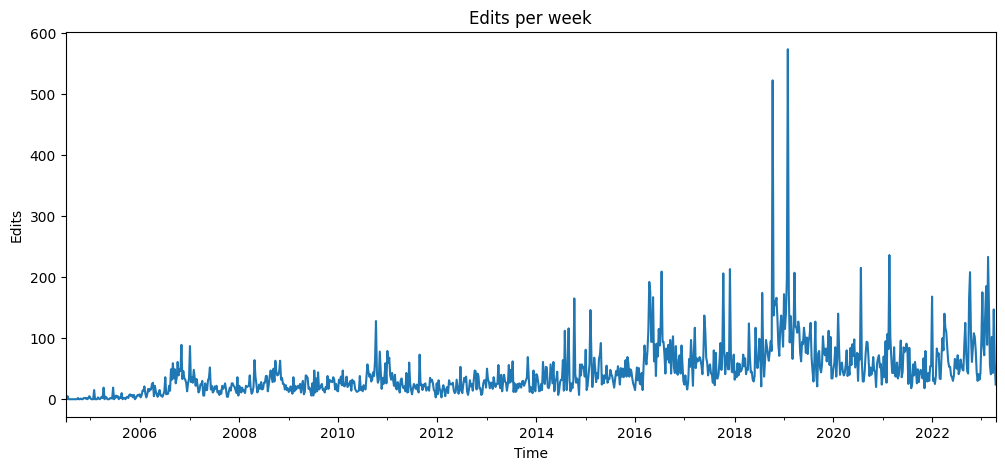

In [66]:
fig = counts['revid'].plot(title="Edits per week", xlabel="Time", ylabel="Edits", figsize=(12,5))
fig